## Libraries

In [1]:
#numerical python
import numpy as np
#pandas
import pandas as pd

# For Visualization 
import seaborn as sns
import matplotlib.pyplot as plt

# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

import scipy.stats as stats
import statsmodels.api as sm

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler

# for logistic regression
from sklearn.linear_model import LogisticRegression

#for random forest
from sklearn.ensemble import RandomForestClassifier

# Performace metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import classification_report

### About the Dataset

#### This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years.

### The data definition is as follows: <br>

0. **url:** URL of the article (non-predictive)<br>
1. **timedelta:** Days between the article publication and the dataset acquisition (non-predictive)<br>
2. **n_tokens_title:** Number of words in the title<br>
3. **n_tokens_content:** Number of words in the content<br>
4. **n_unique_tokens:** Rate of unique words in the content<br>
5. **n_non_stop_words:** Rate of non-stop words in the content<br>
6. **n_non_stop_unique_tokens:** Rate of unique non-stop words in the content<br>
7. **num_hrefs:** Number of links<br>
8. **num_self_hrefs:** Number of links to other articles published by Mashable<br>
9. **num_imgs:** Number of images<br>
10. **num_videos:** Number of videos<br>
11. **average_token_length:** Average length of the words in the content<br>
12. **num_keywords:** Number of keywords in the metadata<br>
13. **data_channel_is_lifestyle:** Is data channel 'Lifestyle'?<br>
14. **data_channel_is_entertainment:** Is data channel 'Entertainment'?<br>
15. **data_channel_is_bus:** Is data channel 'Business'?<br>
16. **data_channel_is_socmed:** Is data channel 'Social Media'?<br>
17. **data_channel_is_tech:** Is data channel 'Tech'?<br>
18. **data_channel_is_world:** Is data channel 'World'?<br>
19. **kw_min_min:** Worst keyword (min. shares)<br>
20. **kw_max_min:** Worst keyword (max. shares)<br>
21. **kw_avg_min:** Worst keyword (avg. shares)<br>
22. **kw_min_max:** Best keyword (min. shares)<br>
23. **kw_max_max:** Best keyword (max. shares)<br>
24. **kw_avg_max:** Best keyword (avg. shares)<br>
25. **kw_min_avg:** Avg. keyword (min. shares)<br>
26. **kw_max_avg:** Avg. keyword (max. shares)<br>
27. **kw_avg_avg:** Avg. keyword (avg. shares)<br>
28. **self_reference_min_shares:** Min. shares of referenced articles in Mashable<br>
29. **self_reference_max_shares:** Max. shares of referenced articles in Mashable<br>
30. **self_reference_avg_sharess:** Avg. shares of referenced articles in Mashable<br>
31. **weekday_is_monday:** Was the article published on a Monday?<br>
32. **weekday_is_tuesday:** Was the article published on a Tuesday?<br>
33. **weekday_is_wednesday:** Was the article published on a Wednesday?<br>
34. **weekday_is_thursday:** Was the article published on a Thursday?<br>
35. **weekday_is_friday:** Was the article published on a Friday?<br>
36. **weekday_is_saturday:** Was the article published on a Saturday?<br>
37. **weekday_is_sunday:** Was the article published on a Sunday?<br>
38. **is_weekend:** Was the article published on the weekend?<br>
39. **LDA_00:** Closeness to LDA topic 0<br>
40. **LDA_01:** Closeness to LDA topic 1<br>
41. **LDA_02:** Closeness to LDA topic 2<br>
42. **LDA_03:** Closeness to LDA topic 3<br>
43. **LDA_04:** Closeness to LDA topic 4<br>
44. **global_subjectivity:** Text subjectivity<br>
45. **global_sentiment_polarity:** Text sentiment polarity<br>
46. **global_rate_positive_words:** Rate of positive words in the content<br>
47. **global_rate_negative_words:** Rate of negative words in the content<br>
48. **rate_positive_words:** Rate of positive words among non-neutral tokens<br>
49. **rate_negative_words:** Rate of negative words among non-neutral tokens<br>
50. **avg_positive_polarity:** Avg. polarity of positive words<br>
51. **min_positive_polarity:** Min. polarity of positive words<br>
52. **max_positive_polarity:** Max. polarity of positive words<br>
53. **avg_negative_polarity:** Avg. polarity of negative words<br>
54. **min_negative_polarity:** Min. polarity of negative words<br>
55. **max_negative_polarity:** Max. polarity of negative words<br>
56. **title_subjectivity:** Title subjectivity<br>
57. **title_sentiment_polarity:** Title polarity<br>
58. **abs_title_subjectivity:** Absolute subjectivity level<br>
59. **abs_title_sentiment_polarity:** Absolute polarity level<br>
60. **shares:** Number of shares (target)<br>

### Load the dataset

In [2]:
data = pd.read_csv('OnlineNewsPopularity.csv')
data.shape

(39644, 61)

### Study the Data

### first five records of the data.

In [3]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


### Summary

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [5]:
data.rename(columns={' shares': 'shares'}, inplace=True)

### Categorical Features

In [6]:
data.select_dtypes(object).head()

,url
0,http://mashable.com/2013/01/07/amazon-instant-...
1,http://mashable.com/2013/01/07/ap-samsung-spon...
2,http://mashable.com/2013/01/07/apple-40-billio...
3,http://mashable.com/2013/01/07/astronaut-notre...
4,http://mashable.com/2013/01/07/att-u-verse-apps/


### Numerical Features

In [7]:
data.select_dtypes(np.number).head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


### Statistical Summary of Numerical columns

In [8]:
data.describe(include='all')

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
unique,39644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,http://mashable.com/2014/07/30/facebook-shut-d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,NaN,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,NaN,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000

### Null/Missing values

In [9]:
data.isnull().sum()
#no null values in the data

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
shares                           0
Length: 61, dtype: int64

### Checking for OUTLIERS

#### 'url' feature is insignificant to our calculations(similar to id, roll no), hence dropping it

In [10]:
df = data.drop('url',axis=1)
df = df.drop('shares',axis=1)
df = df.drop(' timedelta',axis=1)
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


#### box plot to check outliers

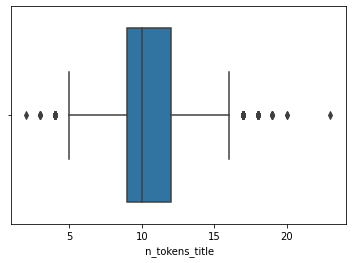

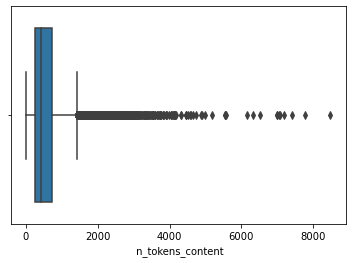

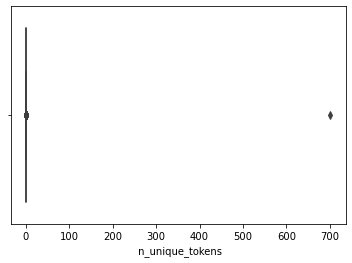

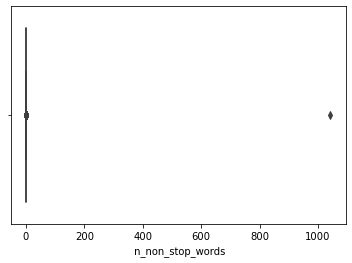

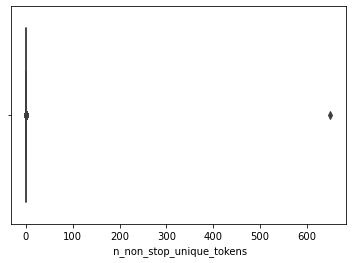

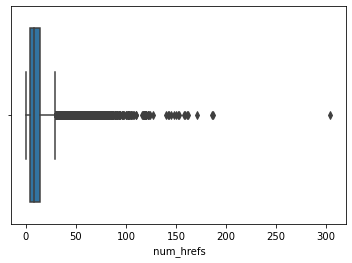

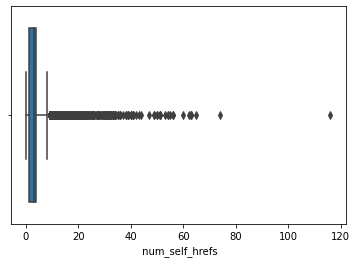

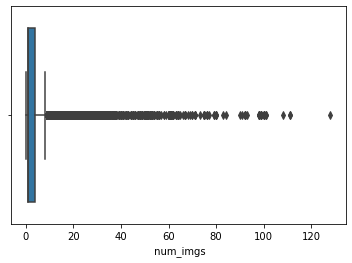

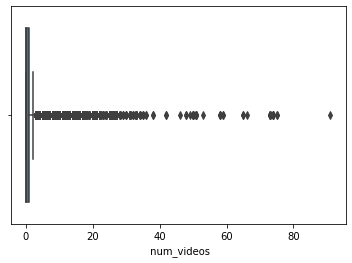

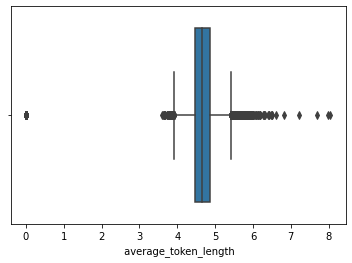

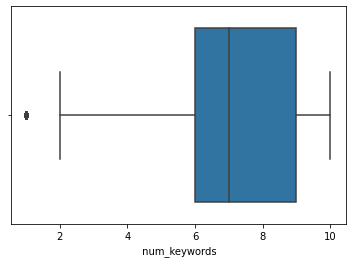

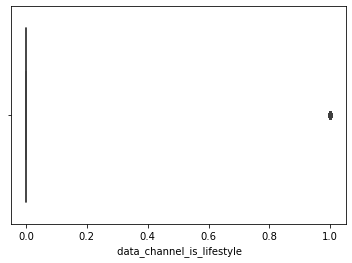

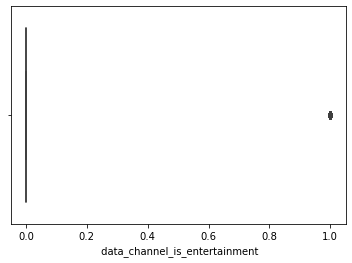

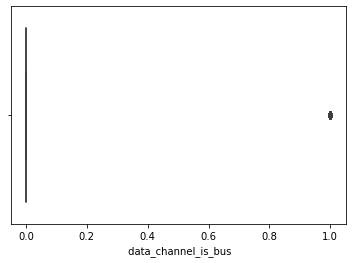

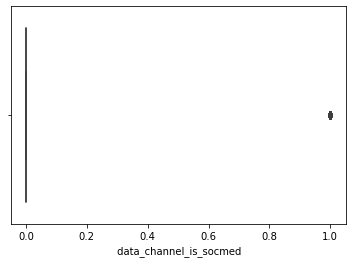

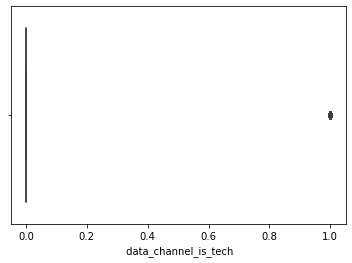

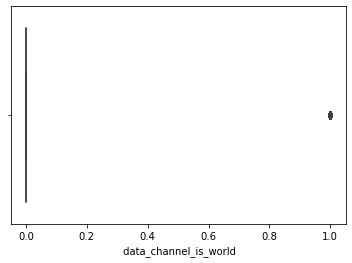

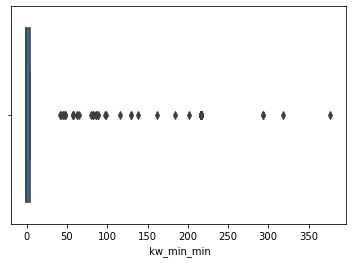

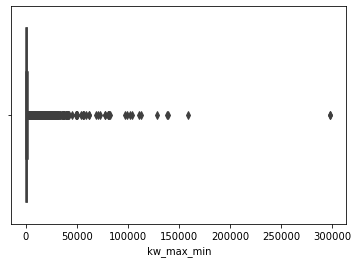

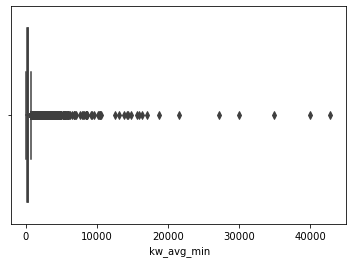

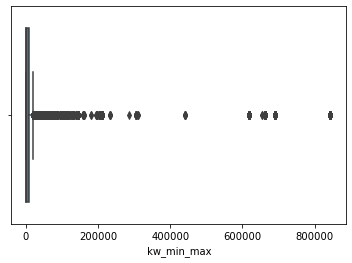

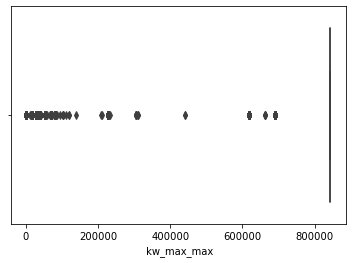

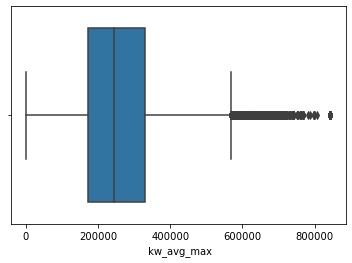

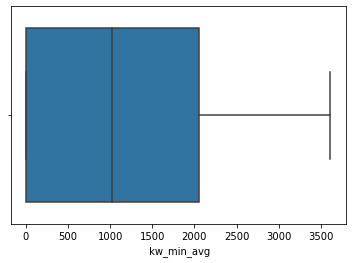

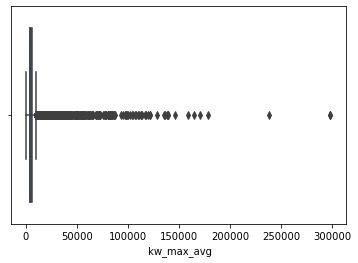

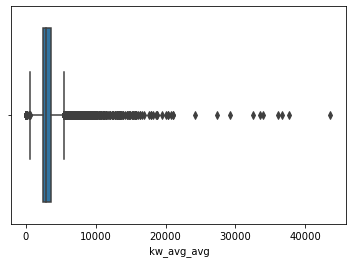

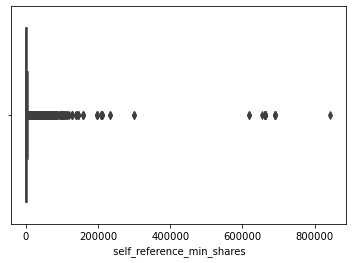

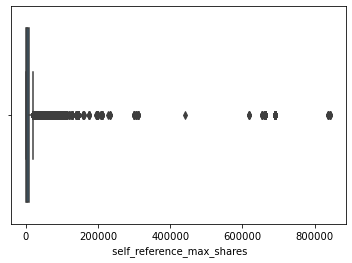

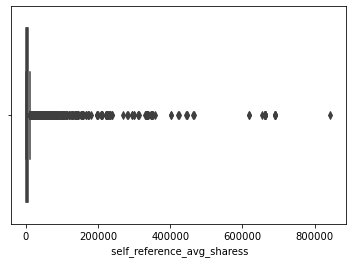

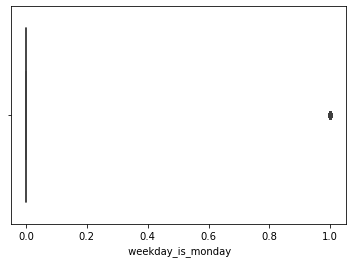

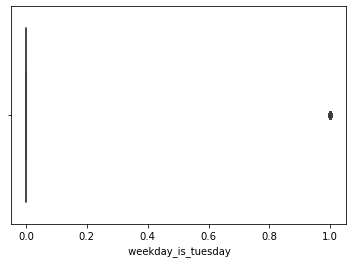

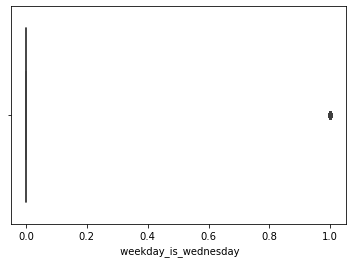

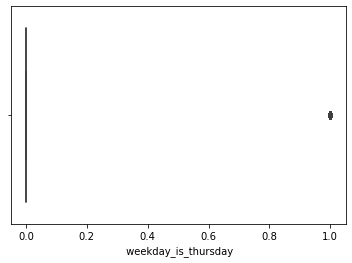

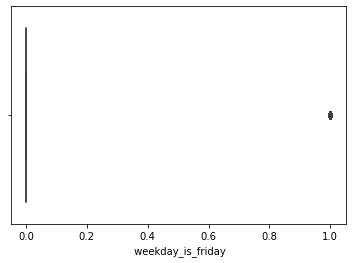

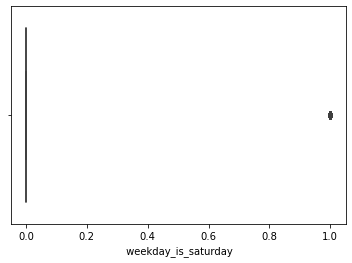

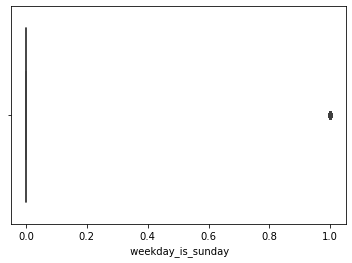

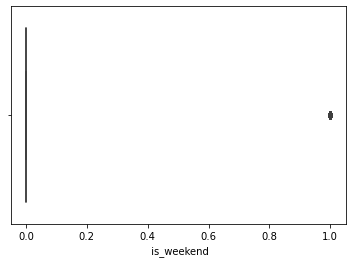

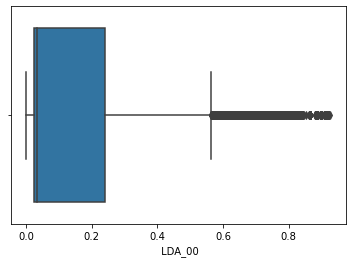

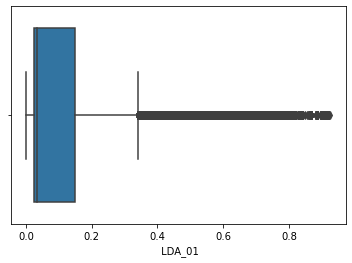

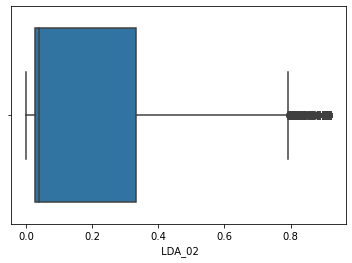

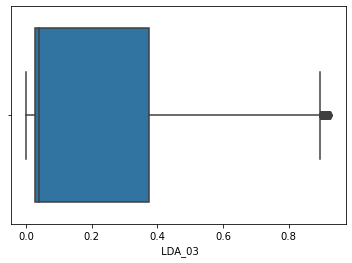

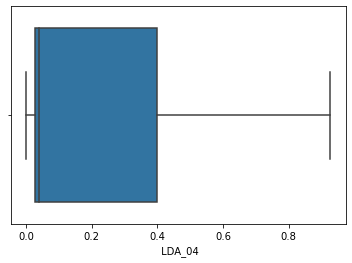

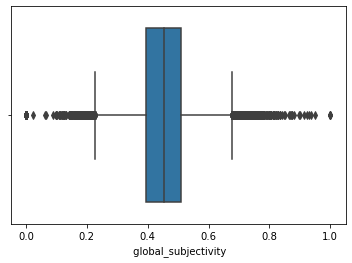

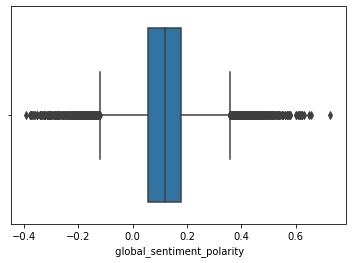

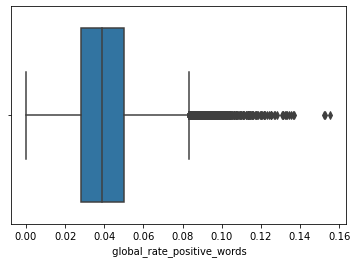

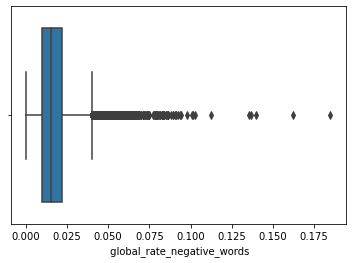

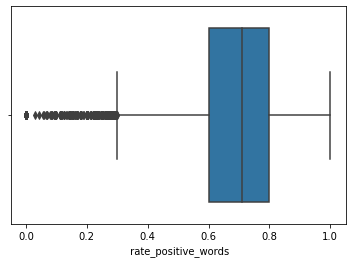

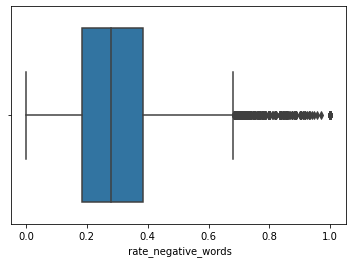

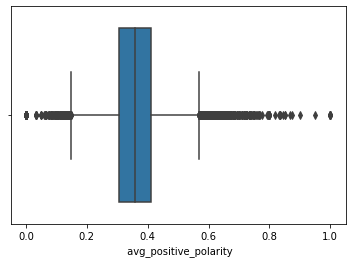

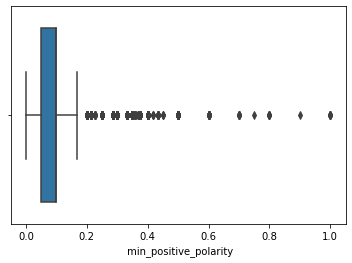

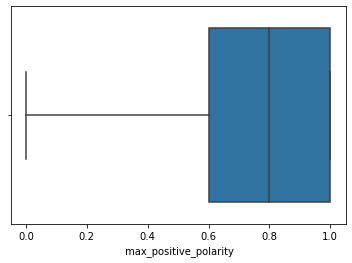

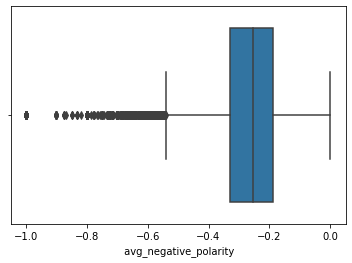

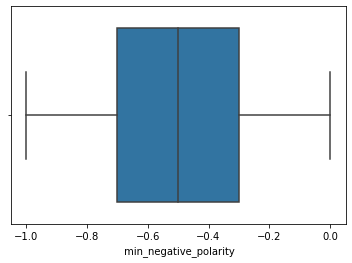

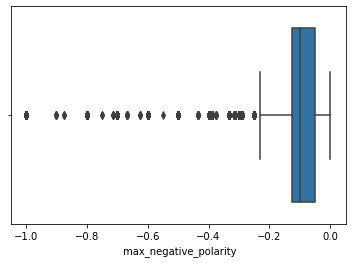

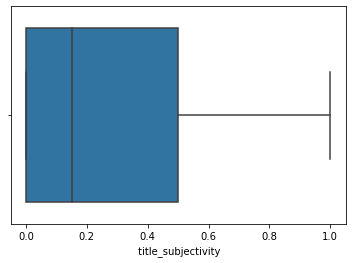

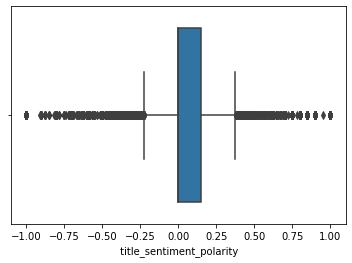

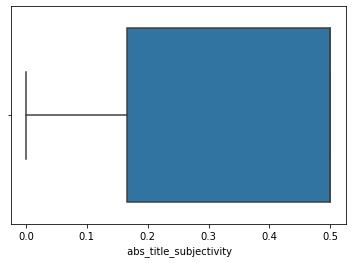

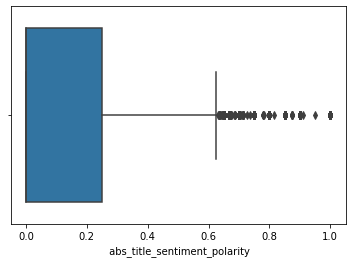

In [11]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

### We can see so many outliers are there.So let's handle the outliers

#### From statistical summary, we can see that our data have negative values.

In [12]:
# Finding negative value columns.
negcols=df.columns[(df<=0).any()]
negcols

Index([' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words',
       ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs',
       ' num_imgs', ' num_videos', ' average_token_length',
       ' data_channel_is_lifestyle', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min',
       ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max',
       ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday',
       ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subjectivity', ' global_sentiment_polarity',
       ' global_rate_positive_words', ' global_

In [13]:
#converting negative values to positive values .

for i in negcols:
    m = df[i].min()
    col = i 
    print(col)
    df[col] = ((df[i]+1)-m)

 n_tokens_content
 n_unique_tokens
 n_non_stop_words
 n_non_stop_unique_tokens
 num_hrefs
 num_self_hrefs
 num_imgs
 num_videos
 average_token_length
 data_channel_is_lifestyle
 data_channel_is_entertainment
 data_channel_is_bus
 data_channel_is_socmed
 data_channel_is_tech
 data_channel_is_world
 kw_min_min
 kw_max_min
 kw_avg_min
 kw_min_max
 kw_max_max
 kw_avg_max
 kw_min_avg
 kw_max_avg
 kw_avg_avg
 self_reference_min_shares
 self_reference_max_shares
 self_reference_avg_sharess
 weekday_is_monday
 weekday_is_tuesday
 weekday_is_wednesday
 weekday_is_thursday
 weekday_is_friday
 weekday_is_saturday
 weekday_is_sunday
 is_weekend
 LDA_00
 LDA_01
 LDA_02
 LDA_03
 LDA_04
 global_subjectivity
 global_sentiment_polarity
 global_rate_positive_words
 global_rate_negative_words
 rate_positive_words
 rate_negative_words
 avg_positive_polarity
 min_positive_polarity
 max_positive_polarity
 avg_negative_polarity
 min_negative_polarity
 max_negative_polarity
 title_subjectivity
 title_sentimen

In [14]:
#checking again for negative columns

# Checking negative columns
negcols=df.columns[(df<=0).any()]
negcols
#df.iloc[:, :35]

Index([], dtype='object')

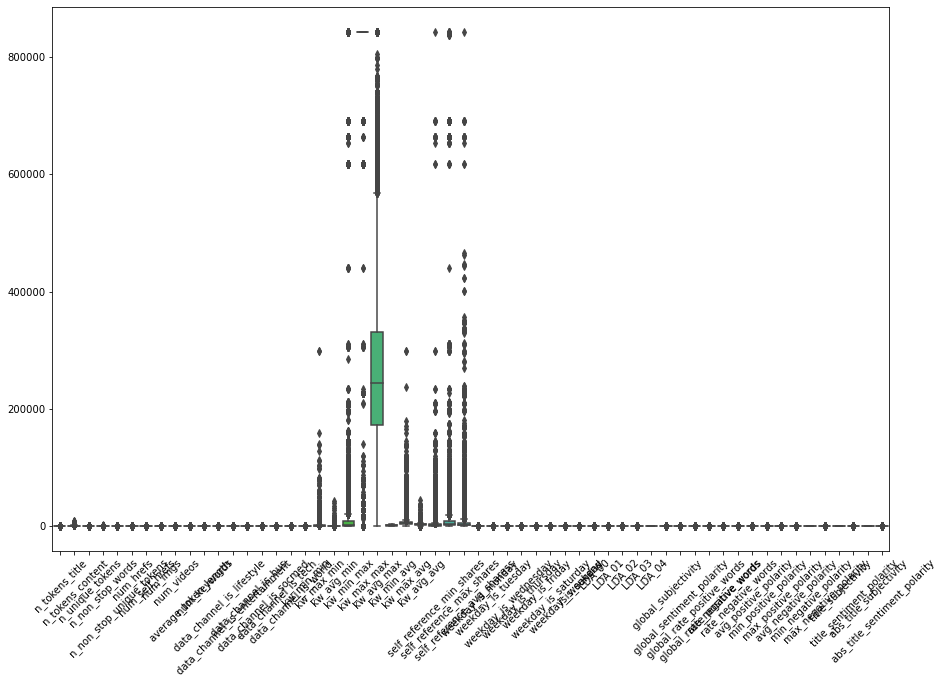

In [15]:
#kk = df.iloc[:, :10]
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.boxplot(data = df)
plt.show()

In [16]:
df.shape

(39644, 58)

In [17]:
# Applying Box-cox Method

from sklearn import preprocessing
pt = preprocessing.PowerTransformer(method='box-cox',standardize=False)
BC_data = pt.fit_transform(df)

In [18]:
bc_data = (pd.DataFrame(BC_data, columns=df.columns))


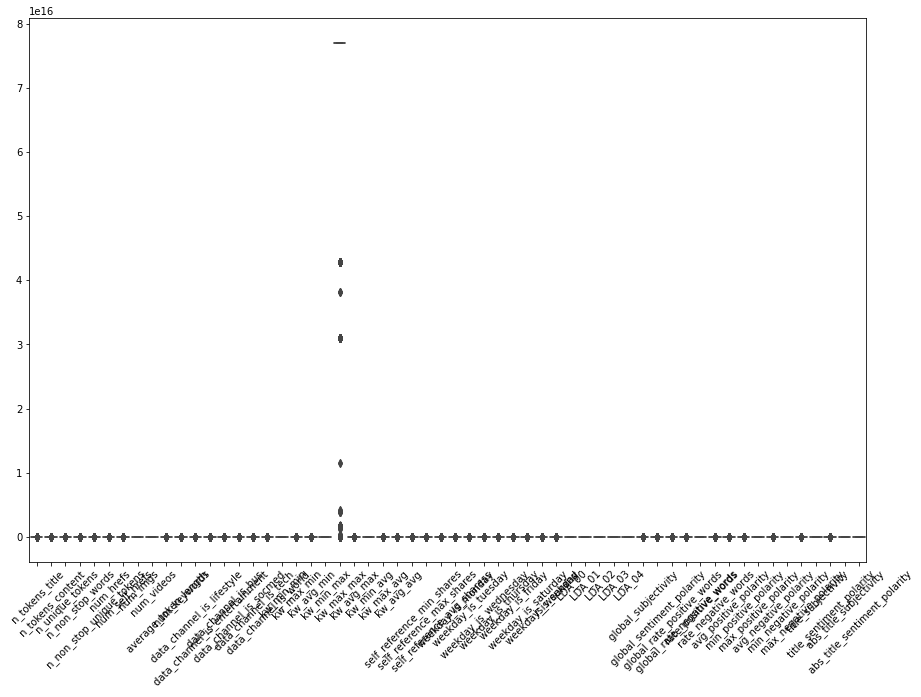

In [19]:
#bc = bc_data.iloc[: , :10]
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.boxplot(data = bc_data)
plt.show()

In [20]:
#Treating outlier :  

for col in bc_data.columns:
    percentiles = bc_data[col].quantile([0.01,0.99]).values
    bc_data[col][bc_data[col] <= percentiles[0]] = percentiles[0]
    bc_data[col][bc_data[col] >= percentiles[1]] = percentiles[1]

0 quartile = 0 quantile = 0 percentile
1 quartile = 0.25 quantile = 25 percentile
2 quartile = .5 quantile = 50 percentile (median)
3 quartile = .75 quantile = 75 percentile
4 quartile = 1 quantile = 100 percentile

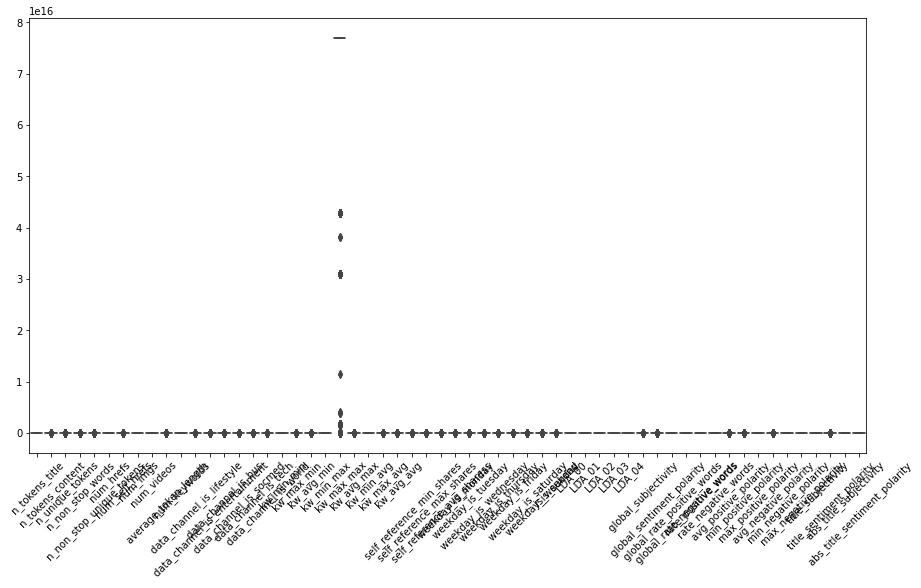

In [21]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = bc_data)
plt.show()

In [22]:
bc_data.shape

(39644, 58)

### Checking for distribution(skewness)

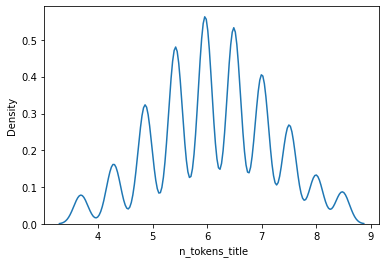

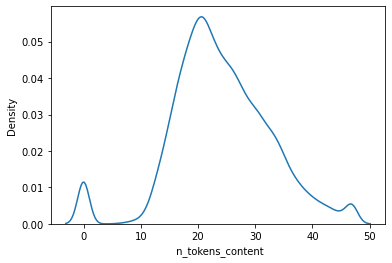

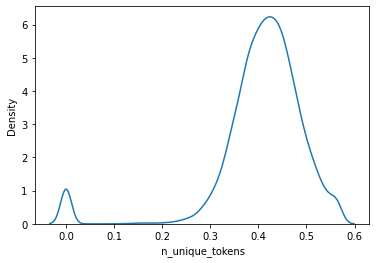

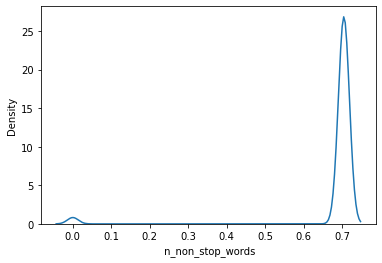

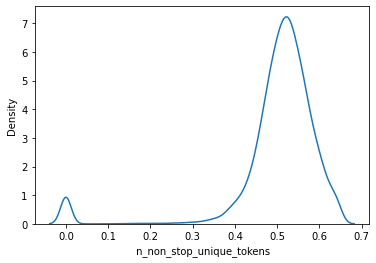

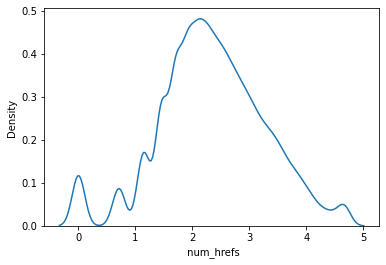

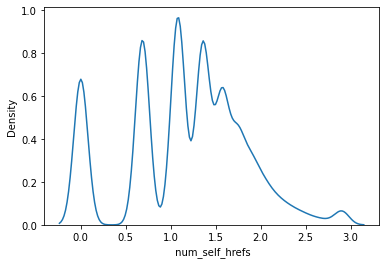

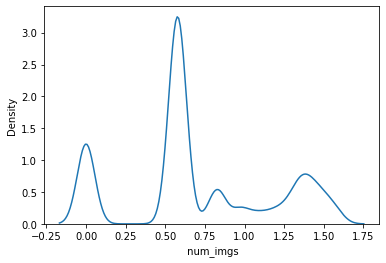

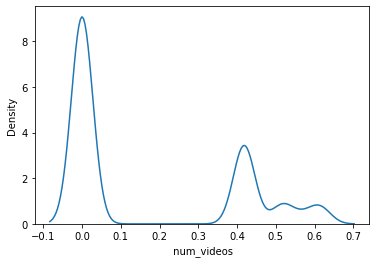

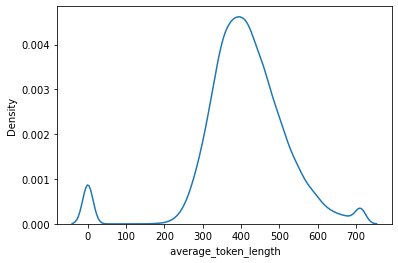

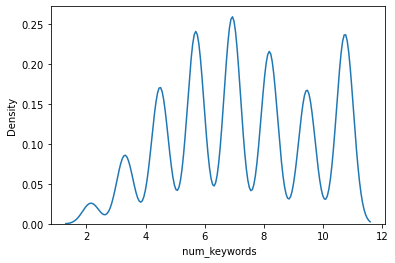

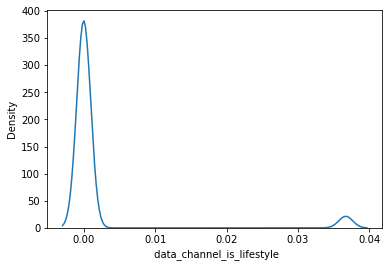

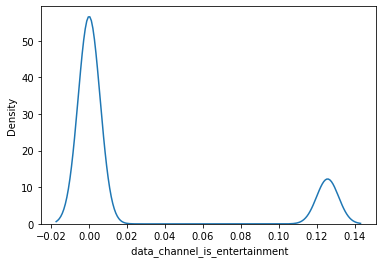

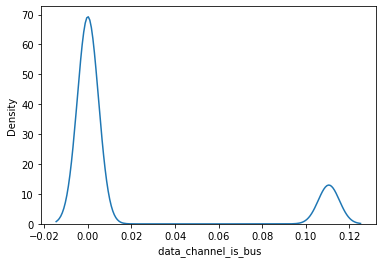

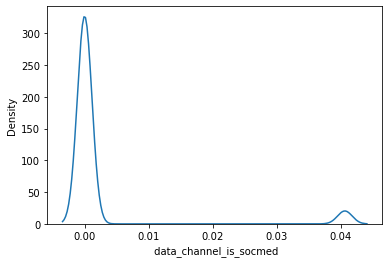

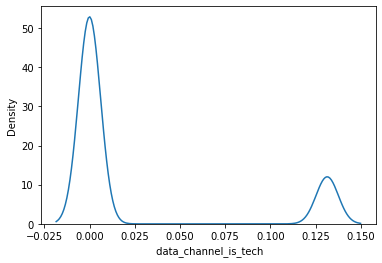

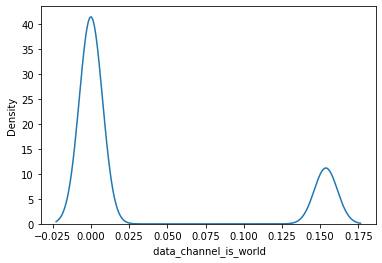

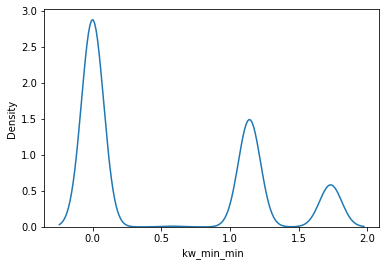

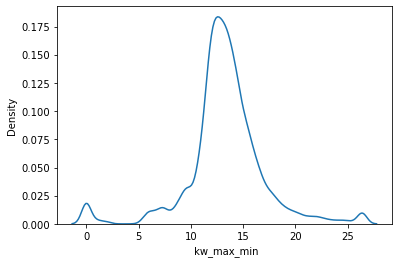

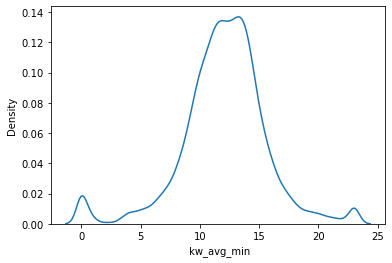

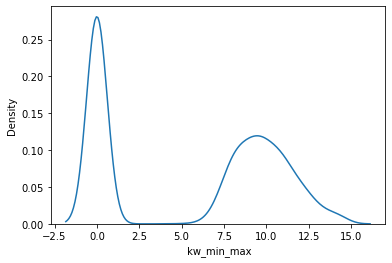

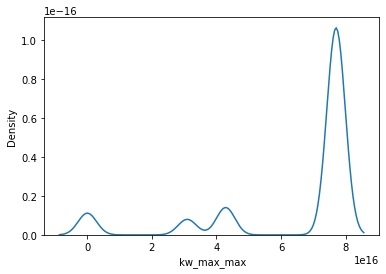

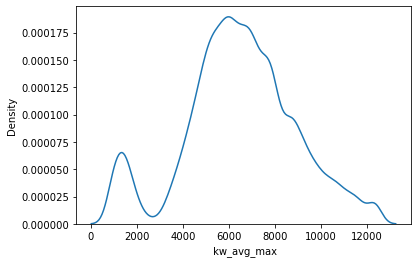

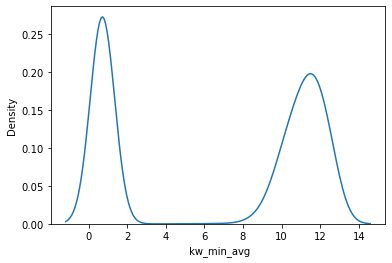

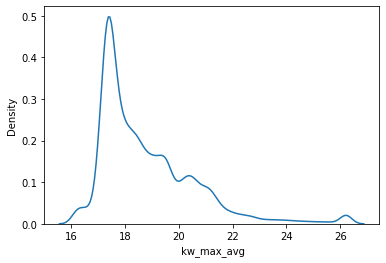

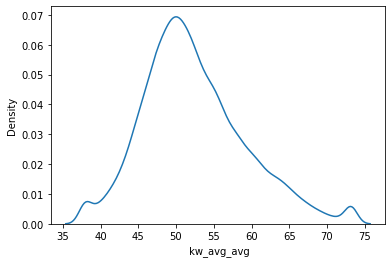

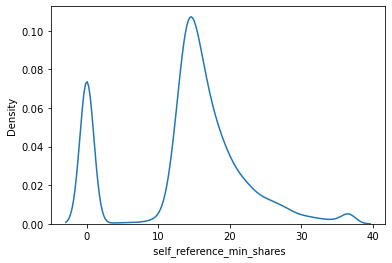

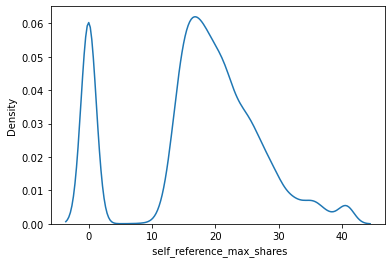

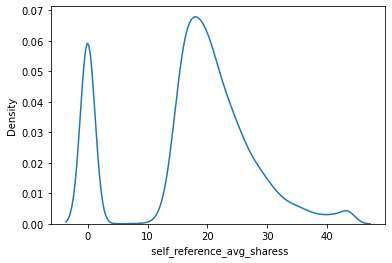

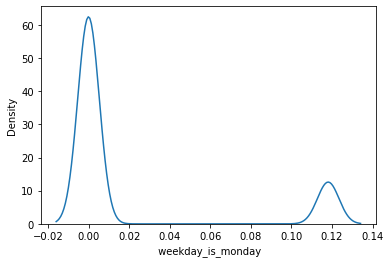

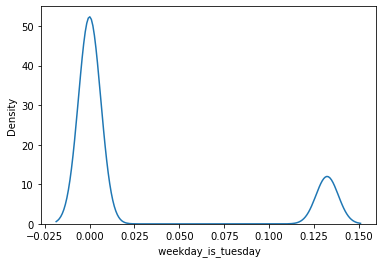

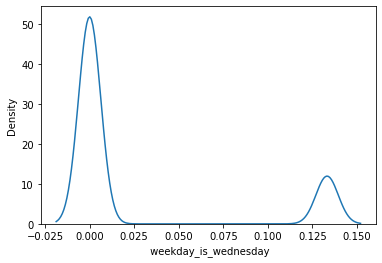

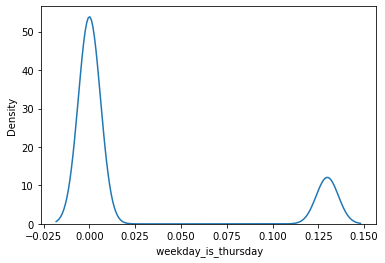

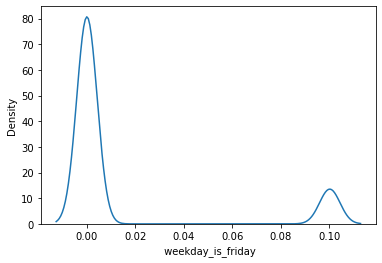

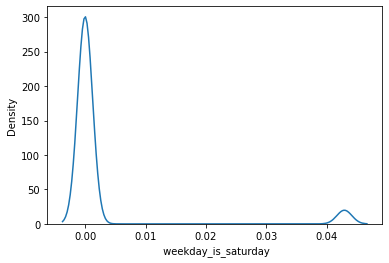

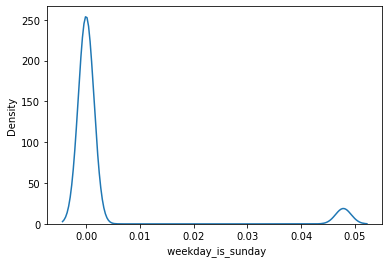

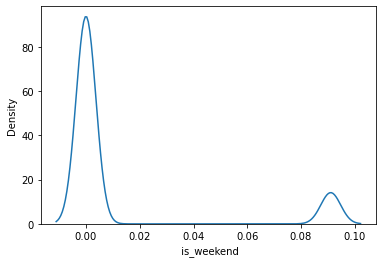

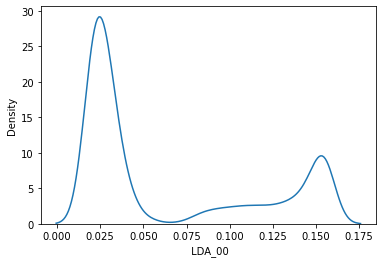

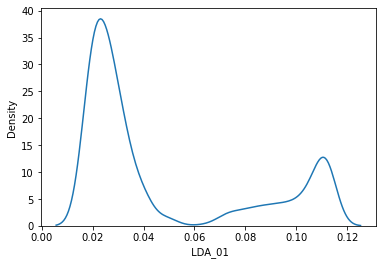

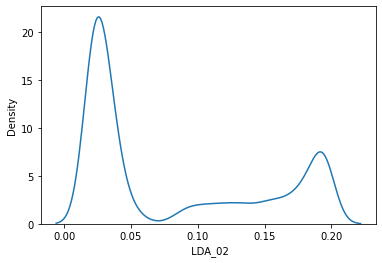

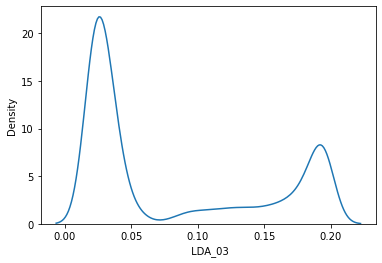

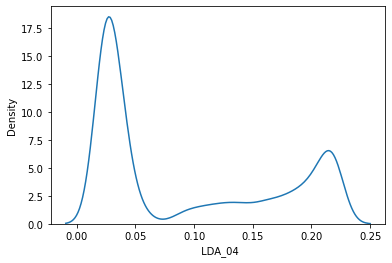

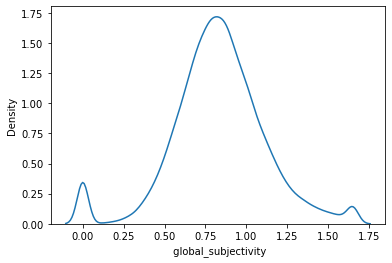

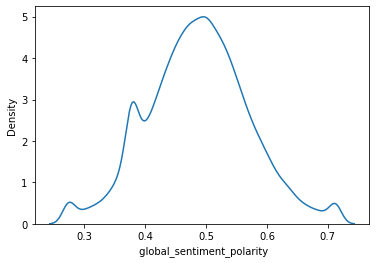

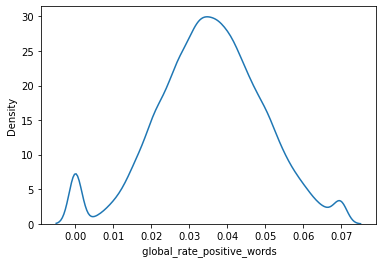

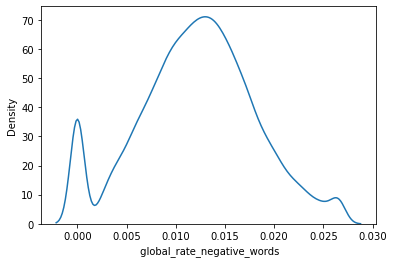

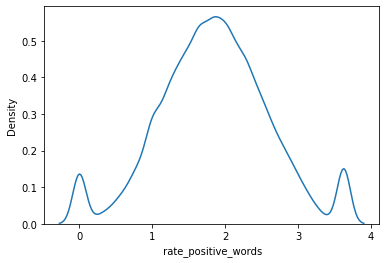

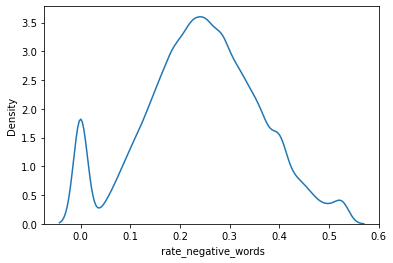

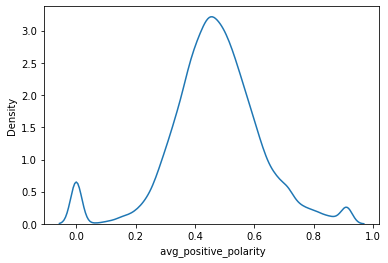

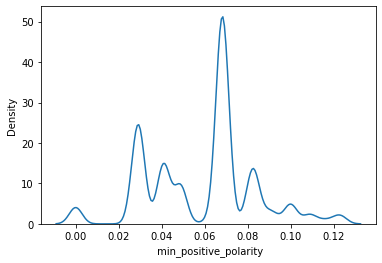

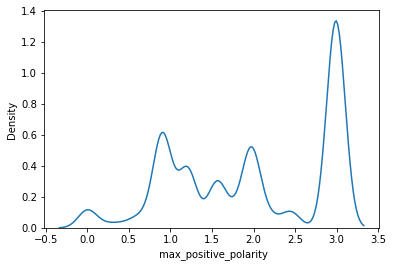

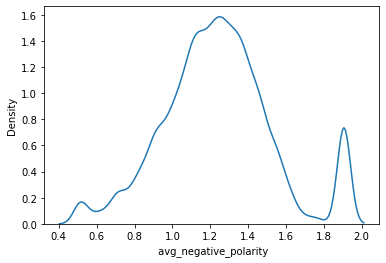

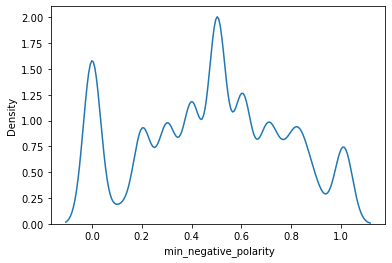

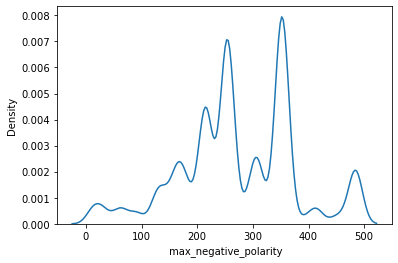

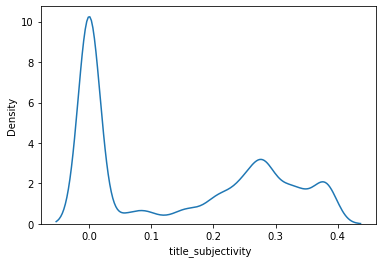

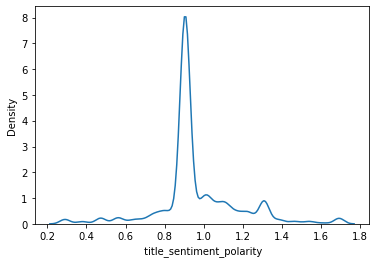

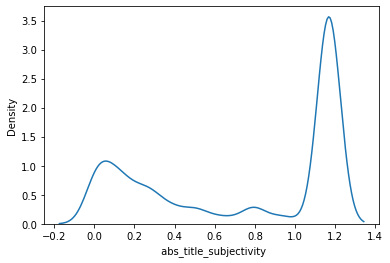

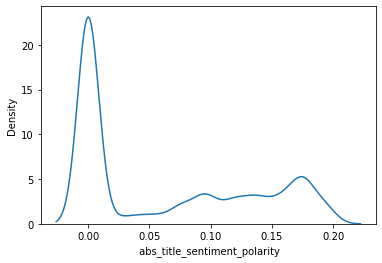

In [23]:
for i in bc_data.columns:
    sns.kdeplot(bc_data[i])
    plt.show()

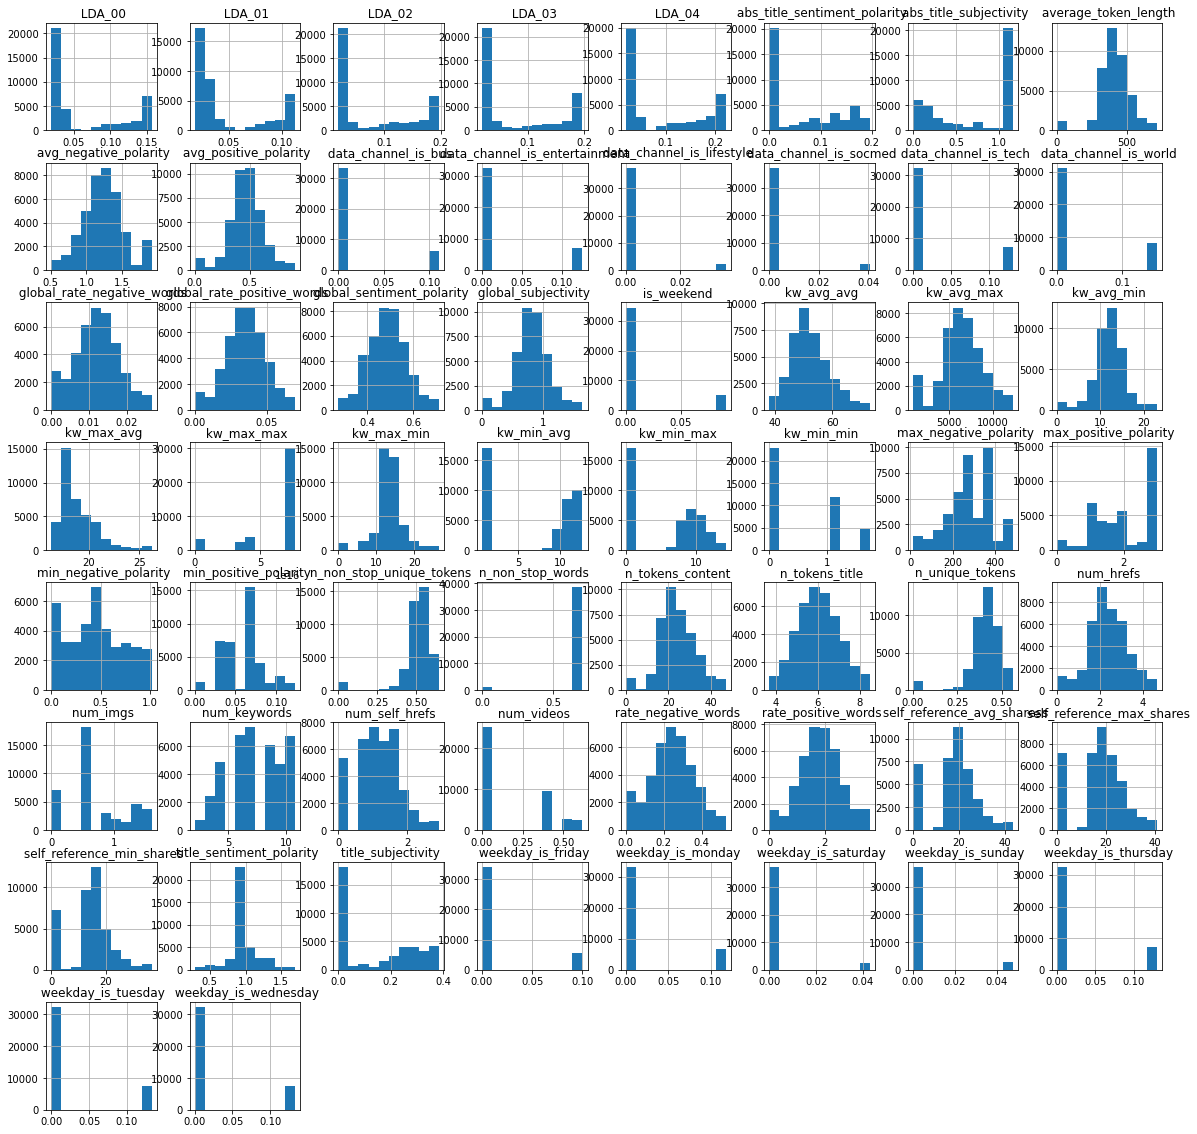

In [24]:
bc_data.hist(figsize=(20,20))
plt.show()

In [25]:
bc_data.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
n_tokens_title,-0.030672,-0.436111
n_tokens_content,-0.027761,0.861221
n_unique_tokens,-2.322596,8.280934
n_non_stop_words,-5.531834,28.602626
n_non_stop_unique_tokens,-3.215718,12.885658
num_hrefs,-0.081442,0.255954
num_self_hrefs,-0.101068,-0.189764
num_imgs,0.173447,-0.776122
num_videos,0.671697,-1.354145
average_token_length,-0.871999,3.600952


In [26]:
### Get the highly correlated features

corr_val = bc_data.corr()

correlated_features = set()
correlation_matrix = corr_val.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(correlation_matrix.columns[j])
            correlated_features.add(colname)
            
print((correlated_features))

{' kw_min_avg', ' abs_title_subjectivity', ' kw_avg_min', ' n_non_stop_words', ' data_channel_is_bus', ' kw_min_min', ' avg_negative_polarity', ' rate_positive_words', ' kw_max_min', ' kw_max_avg', ' abs_title_sentiment_polarity', ' LDA_02', ' kw_avg_avg', ' data_channel_is_tech', ' self_reference_avg_sharess', ' self_reference_min_shares', ' LDA_04', ' kw_max_max', ' n_unique_tokens', ' n_non_stop_unique_tokens', ' kw_min_max', ' global_rate_negative_words', ' min_negative_polarity', ' title_subjectivity', ' global_sentiment_polarity', ' LDA_00', ' rate_negative_words', ' data_channel_is_world', ' self_reference_max_shares'}


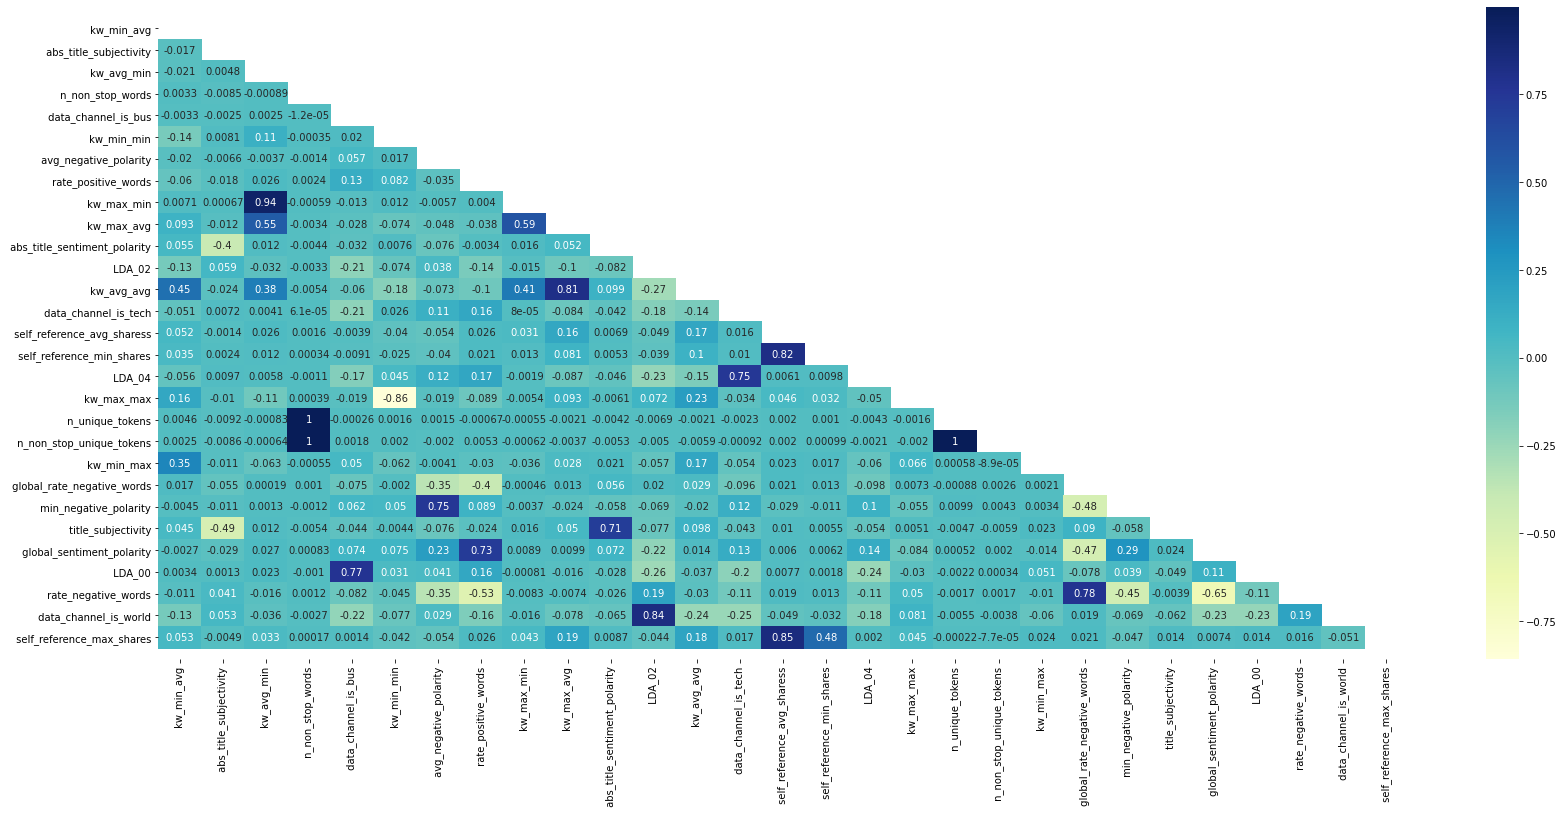

In [27]:
mask = np.zeros_like(bc_data[correlated_features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (28,12))
ax = sns.heatmap(df[correlated_features].corr(),cmap="YlGnBu", annot = True,mask = mask)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [28]:
medn = data['shares'].median()
mean = data['shares'].mean()

In [29]:
print(f'Mean article shares = {mean}')
print(f'Median article share = {medn}')

Mean article shares = 3395.3801836343455
Median article share = 1400.0


In [30]:
weekday = data.columns.values[31:38]
weekday

array([' weekday_is_monday', ' weekday_is_tuesday',
       ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday'],
      dtype=object)

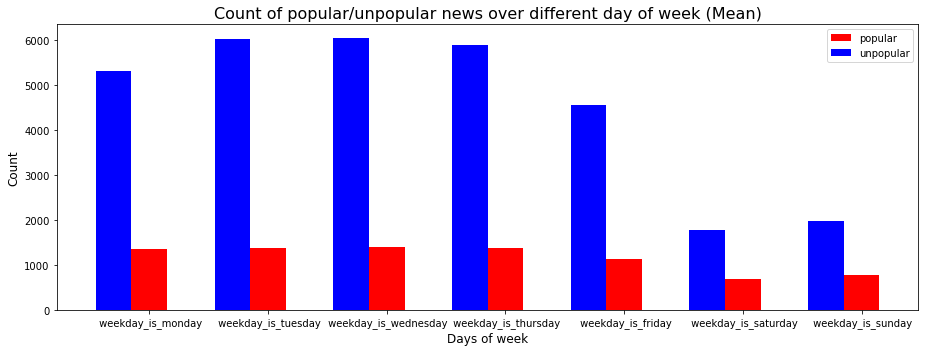

In [31]:
Unpop = data[data['shares']<mean]
Pop = data[data['shares']>=mean]
Unpop_day = Unpop[weekday].sum().values
Pop_day = Pop[weekday].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Mean)", fontsize = 16)
plt.bar(np.arange(len(weekday)), Pop_day, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(weekday)) - 0.3, Unpop_day, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(weekday)), weekday)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

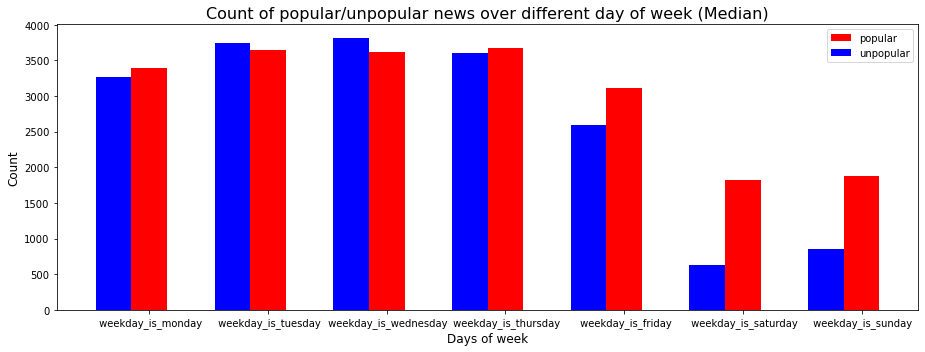

In [32]:
Unpop=data[data['shares']<medn]
Pop=data[data['shares']>=medn]
Unpop_day = Unpop[weekday].sum().values
Pop_day = Pop[weekday].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Median)", fontsize = 16)
plt.bar(np.arange(len(weekday)), Pop_day, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(weekday)) - 0.3, Unpop_day, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(weekday)), weekday)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [33]:
### Transforming Target variable
# Encode the label by threshold 1400 (median value)trgt = pd.DataFrame()
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
popular_label = pd.Series(label_encoder.fit_transform(data['shares']>=1400))

Distribution of classes in percent [53.35990314 46.64009686]


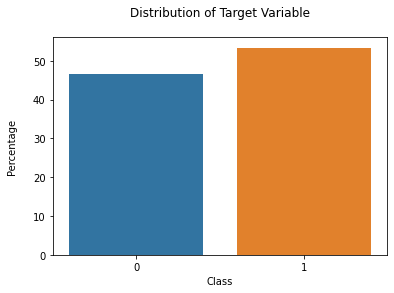

In [34]:
print('Distribution of classes in percent', popular_label.value_counts(normalize=True).values*100)

sns.barplot(x = popular_label.value_counts().index, y = popular_label.value_counts(normalize=True)*100)
plt.title('Distribution of Target Variable\n')
plt.xlabel('Class')
plt.ylabel('Percentage\n')
plt.show()

In [35]:
# The class distributions are balanced.

In [36]:
#independent variables
X = bc_data 
#dependent/Target variable
y = popular_label
X.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,7.001194,17.830379,0.491195,0.704161,0.588851,1.703736,1.080537,0.577487,0.0,413.649982,4.486451,0.0,0.125739,0.000000,0.0,0.000000,0.0,0.577013,0.0,0.760199,0.0,8.399511e+12,892.952449,0.718003,16.215837,37.867379,11.916483,11.757131,12.643654,0.118122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146959,0.106500,0.035714,0.036707,0.036245,1.035903,0.462898,0.040955,0.011241,2.143039,0.206523,0.498584,0.068282,1.560913,1.014922,0.402359,128.723208,0.281874,0.746600,0.000000,0.115887
1,5.420203,19.044656,0.457580,0.704161,0.576176,1.455887,0.685922,0.577487,0.0,492.075229,3.302765,0.0,0.000000,0.110534,0.0,0.000000,0.0,0.577013,0.0,0.760199,0.0,8.399511e+12,892.952449,0.718003,16.215837,37.867379,0.000000,0.000000,0.000000,0.118122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155488,0.039661,0.043511,0.043509,0.044092,0.540573,0.514037,0.038917,0.012524,1.957377,0.234943,0.354744,0.029099,1.560913,1.574366,0.885116,254.096203,0.000000,0.904963,1.168618,0.000000
2,5.420203,17.544086,0.440129,0.704161,0.503708,1.455887,0.685922,0.577487,0.0,330.770177,5.697184,0.0,0.000000,0.110534,0.0,0.000000,0.0,0.577013,0.0,0.760199,0.0,8.399511e+12,892.952449,0.718003,16.215837,37.867379,14.055853,13.846324,15.016583,0.118122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113126,0.028467,0.030326,0.030309,0.210463,1.653546,0.669506,0.049719,0.008253,2.646708,0.133069,0.705438,0.068282,2.990175,0.774770,0.200623,203.387363,0.000000,0.904963,1.168618,0.000000
3,5.420203,25.998842,0.396506,0.704161,0.504748,2.498823,0.000000,0.577487,0.0,333.831219,6.930885,0.0,0.125739,0.000000,0.0,0.000000,0.0,0.577013,0.0,0.760199,0.0,8.399511e+12,892.952449,0.718003,16.215837,37.867379,0.000000,0.000000,0.000000,0.118122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025825,0.108016,0.176621,0.026609,0.026560,0.762077,0.470311,0.037526,0.015454,1.641271,0.285542,0.510751,0.082504,1.973298,0.972451,0.402359,162.143332,0.000000,0.904963,1.168618,0.000000
4,7.503150,34.756753,0.339229,0.704161,0.428436,3.333495,2.863852,1.487715,0.0,414.426369,6.930885,0.0,0.000000,0.000000,0.0,0.131412,0.0,0.577013,0.0,0.760199,0.0,8.399511e+12,892.952449,0.718003,16.215837,37.867379,12.227664,27.450742,20.789946,0.118122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025873,0.025106,0.026331,0.026327,0.220528,1.009733,0.632123,0.062698,0.010172,2.665625,0.130396,0.553295,0.029099,2.990175,1.314935,0.503595,352.259845,0.267303,1.017693,0.049258,0.094823


### Train and Test split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [38]:
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns)

### Logistic Regression

In [39]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [40]:
model=sm.Logit(y_train.values,X_train).fit(maxiter = 100)
model.summary()

Optimization terminated successfully.
         Current function value: 0.616855
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                31715
Model:                          Logit   Df Residuals:                    31658
Method:                           MLE   Df Model:                           56
Date:                Mon, 25 Apr 2022   Pseudo R-squ.:                  0.1071
Time:                        17:03:58   Log-Likelihood:                -19564.
converged:                       True   LL-Null:                       -21910.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1693      0.012     13.861      0.000       0.145       0.193
 n_tokens_title                   -0.0013      0.013     -0.097      0.922      -0.027       0.024
 n_tokens_content                  0.0027      0.040      0.068      0.946      -0.076       0.082
 n_unique_tokens                  -0.1537      0.081     -1.904      0.057      -0.312       0.004
 n_non_stop_words                  0.2891      0.140      2.060      0.039       0.014       0.564
 n_non_stop_unique_tokens          0.0341      0.066      0.515      0.607      -0.096       0.164
 num_hrefs                         0.1329      0.019      7.129      0.000       0.096       0.169
 num_self_hrefs                   -0.0987      0.020     -4.870      0.000      -0.138      -0.059
 num_imgs                          0.0763      0.016      4.796      0.000       0.045       0.107
 num_videos                        0.1030      0.014      7.314      0.000       0.075       0.131
 average_token_length             -0.0220      0.019     -1.163      0.245      -0.059       0.015
 num_keywords                      0.0606      0.016      3.793      0.000       0.029       0.092
 data_channel_is_lifestyle        -0.0059      0.018     -0.335      0.737      -0.041       0.029
 data_channel_is_entertainment    -0.1119      0.020     -5.614      0.000      -0.151      -0.073
 data_channel_is_bus               0.0427      0.027      1.601      0.109      -0.010       0.095
 data_channel_is_socmed            0.2043      0.019     10.924      0.000       0.168       0.241
 data_channel_is_tech              0.2544      0.028      9.215      0.000       0.200       0.309
 data_channel_is_world            -0.0020      0.029     -0.067      0.947      -0.060       0.056
 kw_min_min                       -0.1123      0.020     -5.651      0.000      -0.151      -0.073
 kw_max_min                       -0.1565      0.041     -3.776      0.000      -0.238      -0.075
 kw_avg_min                        0.1955      0.045      4.334      0.000       0.107       0.284
 kw_min_max                       -0.2104      0.086     -2.445      0.014      -0.379      -0.042
 kw_max_max                       -0.2457      0.023    -10.528      0.000      -0.292      -0.200
 kw_avg_max                       -0.0750      0.026     -2.906      0.004      -0.126      -0.024
 kw_min_avg                        0.0014      0.084      0.017      0.987      -0.163       0.165
 kw_max_avg                       -0.2682      0.028     -9.454      0.000      -0.324      -0.213
 kw_avg_avg                        0.7997      0.038     21.314      0.000       0.726       0.873
 self_reference_min_shares        -0.1236      0.050     -2.492      0.013      -0.221      -0.026
 self_reference_max_shares        -0.6415      0.116     -5.527      0.000      -0.869      -0.414
 self_reference_avg_sharess        0.9644      0.147      6.575      0.00

### Using sklearn

In [42]:
logreg = LogisticRegression()
result = logreg.fit(X_train, y_train)
score = result.score(X_test, y_test)
print(score)
result.coef_

0.6641442804893429


array([[ 0.07009996,  0.00530178,  0.04274698, -0.03647659,  0.32582596,
        -0.03795637,  0.13363592, -0.10467246,  0.07527958,  0.09188661,
        -0.02673545,  0.04873043,  0.01705136, -0.08813448,  0.07058993,
         0.228151  ,  0.27898945,  0.02761096, -0.11074072, -0.14822396,
         0.20606527, -0.17178849, -0.25484536, -0.05416888, -0.03591962,
        -0.25722754,  0.77655374, -0.04821771, -0.52162253,  0.78372028,
        -0.01644783, -0.05975815, -0.06548967, -0.02848413,  0.0438913 ,
         0.13485085,  0.07084626,  0.14948882,  0.13138299, -0.05935201,
        -0.0376052 , -0.0515774 ,  0.04631649,  0.0858496 , -0.02550702,
        -0.08160898,  0.15138216, -0.43076494, -0.62533275, -0.00566268,
        -0.05103617, -0.01692773,  0.03248015,  0.00501196, -0.01411825,
         0.0581254 ,  0.04713037,  0.07091178,  0.00422078]])

In [43]:
y_pred = result.predict(X_test)
#y_pred=[0 if x<0.2 else 1 for x in y_pred_prob]

### Confusion Matrix

In [44]:
cm =pd.DataFrame(confusion_matrix(y_test,y_pred),columns=["Predicted 0","Predicted 1"],index=["Actual 0","Actual 1"])
cm

,Predicted 0,Predicted 1
Actual 0,2237,1345
Actual 1,1318,3029


### Performance Metrics

In [45]:
print('Accuracy: ',accuracy_score(y_test,y_pred))

Accuracy:  0.6641442804893429


In [46]:
print('F1: ',f1_score(y_test,y_pred))

F1:  0.6946451095057905


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.62      0.63      3582
           1       0.69      0.70      0.69      4347

    accuracy                           0.66      7929
   macro avg       0.66      0.66      0.66      7929
weighted avg       0.66      0.66      0.66      7929



In [48]:
# checking for model overfitting
print(result.score(X_train, y_train))
print(result.score(X_test, y_test))

0.6618319407220558
0.6641442804893429


In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(),X_train, y_train, cv = 5)
scores.mean()

0.6593094750118241

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
def roccurve(y_test, y_pred):
    fpr, tpr, thresholds= roc_curve(y_test, y_pred)   

    plt.plot(fpr, tpr)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.plot([0, 1], [0, 1],'r--')

    plt.text(x = 0.02, y = 0.9, s = ('AUC Score for full model:', round(roc_auc_score(y_test, y_pred), 4)))

    plt.title('ROC curve for Full Model', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)


    plt.show()            

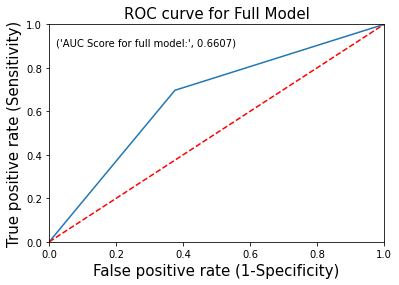

In [51]:
roccurve(y_test, y_pred)

In [52]:
#######

### Feature Selection

In [53]:
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe_model = RFE(estimator= logreg, n_features_to_select= 30)
rfe_model.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=30)

In [54]:
imp_feat = pd.DataFrame(data = rfe_model.ranking_, index = X_train.columns, columns= ['Ranking'])
imp_feat[imp_feat['Ranking']== 1]

,Ranking
const,1
n_unique_tokens,1
n_non_stop_words,1
num_hrefs,1
num_self_hrefs,1
num_imgs,1
num_videos,1
data_channel_is_entertainment,1
data_channel_is_socmed,1
data_channel_is_tech,1


In [55]:
imp_feat_list = list(imp_feat[imp_feat['Ranking']== 1].index)
imp_feat_list

['const',
 ' n_unique_tokens',
 ' n_non_stop_words',
 ' num_hrefs',
 ' num_self_hrefs',
 ' num_imgs',
 ' num_videos',
 ' data_channel_is_entertainment',
 ' data_channel_is_socmed',
 ' data_channel_is_tech',
 ' kw_min_min',
 ' kw_max_min',
 ' kw_avg_min',
 ' kw_min_max',
 ' kw_max_max',
 ' kw_avg_max',
 ' kw_max_avg',
 ' kw_avg_avg',
 ' self_reference_max_shares',
 ' self_reference_avg_sharess',
 ' weekday_is_friday',
 ' weekday_is_saturday',
 ' weekday_is_sunday',
 ' is_weekend',
 ' LDA_00',
 ' LDA_04',
 ' global_rate_negative_words',
 ' rate_positive_words',
 ' rate_negative_words',
 ' title_subjectivity']

### Using Selected Features - Logistic Regression

In [56]:
result = logreg.fit(X_train[imp_feat_list], y_train)
score = result.score(X_test[imp_feat_list], y_test)
print(score)

0.6607390591499559


In [57]:
y_pred = result.predict(X_test[imp_feat_list])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.62      0.62      3582
           1       0.69      0.70      0.69      4347

    accuracy                           0.66      7929
   macro avg       0.66      0.66      0.66      7929
weighted avg       0.66      0.66      0.66      7929



In [58]:
scores = cross_val_score(LogisticRegression(),X_train[imp_feat_list], y_train, cv = 5)
scores.mean()

0.659656314046981

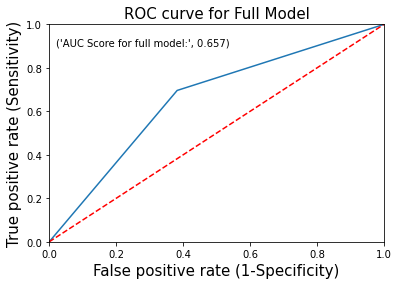

In [59]:
roccurve(y_test, y_pred)

###  Using imp features - Random Forest

In [60]:
rf_classification = RandomForestClassifier(n_estimators = 100, min_samples_leaf=10, max_samples=200, random_state = 10)
rf_model = rf_classification.fit(X_train[imp_feat_list], y_train)

In [61]:
train_pred = rf_model.predict(X_test[imp_feat_list])
test_report = classification_report(y_test, train_pred)
print(test_report)

              precision    recall  f1-score   support

           0       0.63      0.52      0.57      3582
           1       0.66      0.75      0.70      4347

    accuracy                           0.65      7929
   macro avg       0.64      0.64      0.63      7929
weighted avg       0.64      0.65      0.64      7929



In [62]:
#checking for model overfitting
print(rf_model.score(X_train[imp_feat_list], y_train))
print(rf_model.score(X_test[imp_feat_list], y_test))

0.6362919754059593
0.6459831000126119


In [63]:
scores = cross_val_score(RandomForestClassifier(),X_train[imp_feat_list], y_train, cv = 5)
scores.mean()

0.6628724578275265

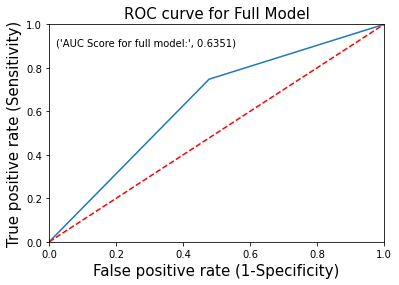

In [64]:
roccurve(y_test, train_pred)

### Hyper Parameter Tuning - RF

In [68]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion' : ['entropy', 'gini'],
                        'n_estimators' : [100, 150, 200, 250],
                        'min_samples_leaf' : [10, 20, 30],
                    'max_samples':[150,200, 300, 400, 500]}]

model = RandomForestClassifier(random_state=10)
tree_grid = GridSearchCV(estimator= model, param_grid = tuned_parameters,
                        cv = 5)

tree_grid.fit(X_train[imp_feat_list], y_train)
tree_grid.best_params_

KeyboardInterrupt: 

In [ ]:
rf_model = RandomForestClassifier(n_estimators=200,criterion='entropy', max_samples=500, min_samples_leaf=10)
scores = cross_val_score(estimator= model,
               X = X_train[imp_feat_list], y = y_train,
               cv = 10, scoring = 'roc_auc')
round(scores.mean(),2)


### Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=200, random_state=10)
ada_model.fit(X_train[imp_feat_list], y_train)
y_pred = ada_model.predict(X_test[imp_feat_list])

round(accuracy_score(y_test, y_pred),2)

In [ ]:
test_report = classification_report(y_test, y_pred)
print(test_report)

# sfs

In [41]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
logreg = LogisticRegression()
sfs1 = SFS(estimator= logreg, 
           k_features="best", 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    0.5s finished

[2022-04-25 17:04:16] Features: 1/59 -- score: 0.5965000788270535[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    0.7s finished

[2022-04-25 17:04:17] Features: 2/59 -- score: 0.6105312943402176[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    0.9s finished

[2022-04-25 17:04:18] Features: 3/59 -- score: 0.6218508592148826[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    2.0s finished

[2022-04-25 17:04:55] Features: 28/59 -- score: 0.6582374270849756[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    2.4s finished

[2022-04-25 17:04:57] Features: 29/59 -- score: 0.659025697619423[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    3.2s finished

[2022-04-25 17:05:01] Features: 30/59 -- score: 0.6594986599400915[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    3.2s finished

[2022-04-25 17:05:04] Features: 31/5

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s finished

[2022-04-25 17:06:23] Features: 56/59 -- score: 0.663282358505439[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s finished

[2022-04-25 17:06:24] Features: 57/59 -- score: 0.6638814441116191[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s finished

[2022-04-25 17:06:25] Features: 58/59 -- score: 0.6636607283619739[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 

In [42]:
#sfs1.k_feature_idx_

In [43]:
imp_feat=list(sfs1.k_feature_names_)
imp_feat

['const',
 ' n_tokens_title',
 ' n_tokens_content',
 ' n_unique_tokens',
 ' n_non_stop_words',
 ' n_non_stop_unique_tokens',
 ' num_hrefs',
 ' num_self_hrefs',
 ' num_videos',
 ' average_token_length',
 ' data_channel_is_lifestyle',
 ' data_channel_is_entertainment',
 ' data_channel_is_bus',
 ' data_channel_is_socmed',
 ' data_channel_is_tech',
 ' data_channel_is_world',
 ' kw_min_min',
 ' kw_max_min',
 ' kw_avg_min',
 ' kw_min_max',
 ' kw_max_max',
 ' kw_avg_max',
 ' kw_max_avg',
 ' kw_avg_avg',
 ' self_reference_min_shares',
 ' self_reference_max_shares',
 ' self_reference_avg_sharess',
 ' weekday_is_monday',
 ' weekday_is_tuesday',
 ' weekday_is_wednesday',
 ' weekday_is_thursday',
 ' weekday_is_friday',
 ' weekday_is_saturday',
 ' weekday_is_sunday',
 ' is_weekend',
 ' LDA_00',
 ' LDA_02',
 ' LDA_03',
 ' global_subjectivity',
 ' global_sentiment_polarity',
 ' global_rate_positive_words',
 ' global_rate_negative_words',
 ' rate_positive_words',
 ' rate_negative_words',
 ' avg_positi

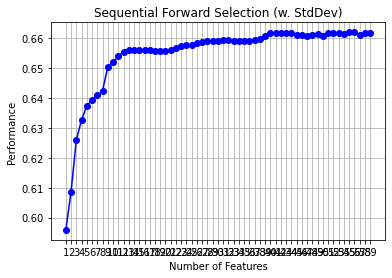

In [100]:
metric_dict = sfs1.get_metric_dict(confidence_interval=0.95)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(metric_dict, kind='std_dev')
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

# Using Selected Features - Logistic Regression

In [44]:
result = logreg.fit(X_train[imp_feat], y_train)
score = result.score(X_test[imp_feat], y_test)

In [45]:
y_pred = result.predict(X_test[imp_feat])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.61      0.63      3712
           1       0.68      0.71      0.69      4217

    accuracy                           0.66      7929
   macro avg       0.66      0.66      0.66      7929
weighted avg       0.66      0.66      0.66      7929



In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(),X_train[imp_feat], y_train, cv = 5)
scores.mean()

0.6619895948289453

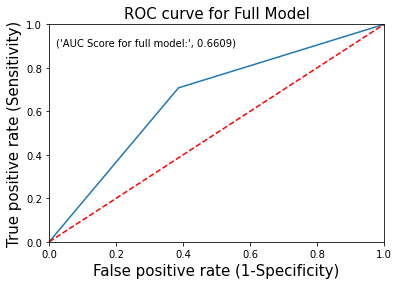

In [50]:
roccurve(y_test, y_pred)

# #Using imp features - Random Forest

In [51]:
rf_classification = RandomForestClassifier(n_estimators = 100, min_samples_leaf=10, max_samples=200, random_state = 10)
rf_model = rf_classification.fit(X_train[imp_feat], y_train)

In [52]:
train_pred = rf_model.predict(X_test[imp_feat])
test_report = classification_report(y_test, train_pred)
print(test_report)

              precision    recall  f1-score   support

           0       0.65      0.52      0.57      3712
           1       0.64      0.75      0.69      4217

    accuracy                           0.64      7929
   macro avg       0.64      0.63      0.63      7929
weighted avg       0.64      0.64      0.64      7929



In [53]:
#checking for model overfitting
print(rf_model.score(X_train[imp_feat], y_train))
print(rf_model.score(X_test[imp_feat], y_test))

0.6341478795522624
0.6421995207466263


In [54]:
scores = cross_val_score(RandomForestClassifier(),X_train[imp_feat], y_train, cv = 5)
scores.mean()

0.6600977455462714

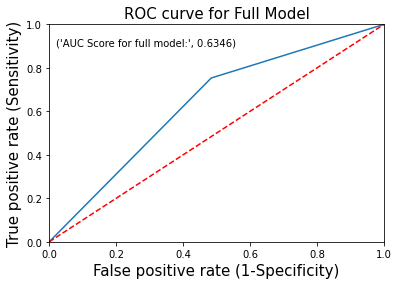

In [55]:
roccurve(y_test, train_pred)

# Hyper Parameter Tuning - RF

In [57]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion' : ['entropy','gini'],
                        'n_estimators' : [250, 300, 350],
                        'min_samples_leaf' : [10, 15],
                    'max_samples':[500, 600, 700]}]

model = RandomForestClassifier(random_state=10)
tree_grid = GridSearchCV(estimator= model, param_grid = tuned_parameters,
                        cv = 5)

tree_grid.fit(X_train[imp_feat], y_train)
tree_grid.best_params_

{'criterion': 'entropy',
 'max_samples': 700,
 'min_samples_leaf': 10,
 'n_estimators': 350}

In [58]:
rf_model = RandomForestClassifier(n_estimators=350,criterion='entropy', max_samples=700, min_samples_leaf=10)
scores = cross_val_score(estimator= model,
               X = X_train[imp_feat], y = y_train,
               cv = 10, scoring = 'roc_auc')
round(scores.mean(),2)

0.72

# Adaboost

In [83]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=200, random_state=10)
ada_model.fit(X_train[imp_feat], y_train)
y_pred = ada_model.predict(X_test[imp_feat])
round(accuracy_score(y_test, y_pred),2)

0.67

In [84]:
test_report = classification_report(y_test, y_pred)
print(test_report)

              precision    recall  f1-score   support

           0       0.63      0.62      0.63      3582
           1       0.69      0.71      0.70      4347

    accuracy                           0.67      7929
   macro avg       0.66      0.66      0.66      7929
weighted avg       0.67      0.67      0.67      7929

